<a href="https://colab.research.google.com/github/jihansand/StudyCase01-Komputasi-Statistik-SVD-Topic-Modelling/blob/main/Kelompok_3_Latihan_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set(style="ticks", color_codes=True)
from numpy.random import seed
from numpy.random import rand
from random import random
from random import randint

"Done"

'Done'

# Soal 01: Multiplicative Congruential

1. Buatlah sebuah fungsi pembangkit bilangan acak dengan fungsi Greenberger (Multiplicative congruential.) dengan ketentuan modifikasi sebagai berikut:
 * 	Xo = 11, a=7, c=5, m = $2^{32}$
 * 	Input fungsi adalah $N$ (jumlah bilangan yang akan dibangkitkan)
 *	Output fungsi adalah sebuah skalar: rata-rata semua $N$ suku dibarisan yang dibangkitkan.
 *  Jangan lupa untuk menormalisasi semua sukunya dengan $m$.

2. Jika $X = x_1, x_2, ..., x_N$ adalah barisan $N$ output dari fungsi diatas, apakah distribusi dari $X$? Jelaskan.

3. Apakah $X$ memiliki periode? jelaskan.

Rata-rata semua N suku di barisan yang dibangkitkan adalah 2152662615.3768
Barisan angka random: [82, 579, 4058, 28411, 198882, 1392179, 9745258, 68216811, 477517682, 3342623779, 1923529978, 579807963, 4058655746, 2640786451, 1305635978, 549517259, 3846620818, 1156541955, 3800826394, 835980987, 1556899618, 2308362739, 3273637290, 1440624555, 1494437298, 1871126499, 212983610, 1490885275, 1846262338, 38934483, 272541386, 1907789707, 469626066, 3287382467, 1536840794, 2167950971, 2290754914, 3150382515, 577841130, 4044887915, 2544411634, 631012259, 122118522, 854829659, 1688840322, 3231947667, 1148797194, 3746613067, 456487698, 3195413891, 893060762, 1956458043, 810304418, 1377163635, 1050210858, 3056508715, 4215691826, 3740039011, 410469306, 2873285147, 2933126850, 3352018771, 1989294922, 1040162571, 2986170706, 3723325763, 293476570, 2054335995, 1495450082, 1878215987, 262610026, 1838270187, 4277956722, 4175893283, 3461449210, 2755307995, 2107286786, 1866105619, 177837450, 1244862155, 

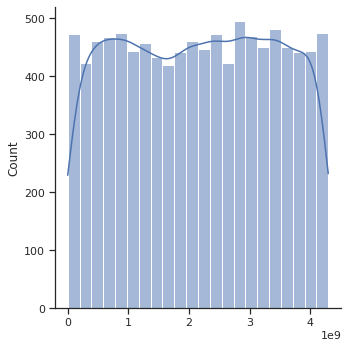

In [ ]:
x0 = 11
a = 7
c = 5
m = pow(2,32)
List_angka = []  #ANGKA RANDOM
List_angka2 = [] #NORMALISASI

def GreenbergerRev(N):
  pengali = x0
  for i in range(N):
    angka = (a*pengali + c)%m
    List_angka.append(angka)
    pengali = angka
    angka2 = angka/m #NORMALISASI
    List_angka2.append(angka2)
  Hasil = sum(List_angka)/len(List_angka)
  print("Rata-rata semua N suku di barisan yang dibangkitkan adalah {}".format(Hasil), end = "\n")

GreenbergerRev(10_000)

print("Barisan angka random: {}".format(List_angka))

plot = sns.displot(x=List_angka, kde=True)
print(plot)

AxesSubplot(0.125,0.125;0.775x0.755)


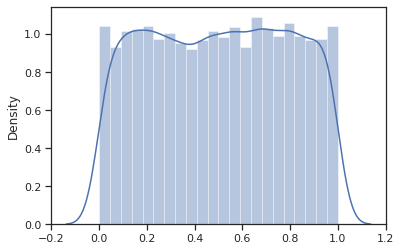

In [ ]:
plot2 = sns.distplot(x = List_angka2, kde = True)
print(plot2)

1. Rata-rata semua $N (N = 10000)$ suku di barisan yang dibangkitkan adalah 2152662615.3768
2. Distribusi dari $X$ adalah distribusi uniform, hal ini dapat dilihat dari visualisasi plot yang dihasilkan, di mana untuk rentang dari 0 sampai 1, peluangnya itu cenderung sama, yaitu di sekitar 0.9 an ish
3. X memiliki periode yang selalu < $2^{32}$

# Soal 02: Poisson Distribution

* Algoritma untuk menghasilkan bilangan random diskrit berdistribusi Poisson dapat anda temukan dari beberapa sumber di dunia maya: https://www.google.com/search?q=algorithm+generate+poisson+distribution&newwindow=1&sxsrf=ALiCzsbKw0SJtuLmaOS3B9XNVrTNtbeuXw:1665702878239&source=lnms&tbm=isch&sa=X&ved=2ahUKEwixjO_iqt76AhXpcGwGHavxB88Q_AUoAXoECAEQAw#imgrc=pnIy3d_qBdlPnM

1. Aplikasikan algoritma tersebut dengan bahasa Python (tanpa menggunakan module : Pure Python).

2. Bandingkan hasil anda (melalui visualisasi) dengan distribusi Python yang dihasilkan oleh Numpy menggunakan 100.000 sample.
 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html


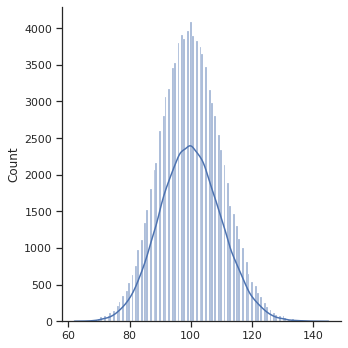

In [ ]:
#Pure Python
N = 100_000
list_angka_Poisson = []
seed(2)
def Poisson(lambdanya):
  el, n, u = np.exp(-lambdanya), 0, np.random.uniform(0,1)
  pp, fact, pow = el, 1, 1
  while u > pp:
    n += 1
    fact, pow = n*fact, lambdanya*pow
    pp += (pow/fact)*el
  return n

for i in range(N):
  list_angka_Poisson.append(Poisson(100))

plot_Poisson_PP = sns.displot(x=list_angka_Poisson, kde=True)
print(plot_Poisson_PP)

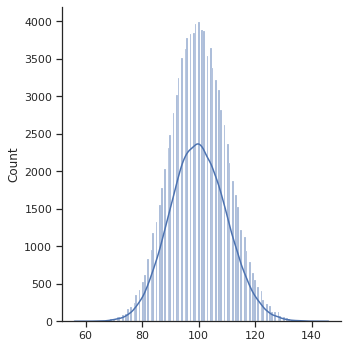

In [ ]:
#Numpy
N = 100_000
Poisson_numpy = np.random.poisson(lam = 100, size = N)

plot_Poisson_numpy = sns.displot(x=Poisson_numpy, kde=True)
print(plot_Poisson_numpy)

**Kesimpulan**

Dari hasil di atas, dapat dilihat kedua plot yang dihasilkan oleh Pure Python ataupun Numpy cenderung memiliki tinggi kurva yang sama (mencapai 4000) untuk 1000 sampel.

# Soal 03: CRUDE MONTE CARLO

* Di Module RNG minggu lalu sudah dibahas tentang Hit-or-Miss Monte Carlo untuk penyelesaian pendekatan dari sebuah integral. Namun Metode Crude Monte Carlo belum dibahas. Keterangan Metode Crude Monte Carlo adalah sebagai berikut:

<img alt="" src="https://github.com/taudataid/KompStat-CaseStudies/blob/main/images/crude-MC.png?raw=1"/>

* Atau anda juga bisa membaca lebih lanjut di tautan berikut: https://www.google.com/search?q=%22Crude+monte+carlo%22+integral&oq=%22Crude+monte+carlo%22+integral&aqs=edge..69i57.8774j0j1&sourceid=chrome&ie=UTF-8

* Menggunakan fungsi yang sama dengan yang ada di module kuliah $$\theta = \int_0^1 \frac{e^x-1}{e-1} dx$$
Tentukan:
1. Solusi Pendekatannya menggunakan Crude MC dengan N = 100
2. Bandingkan hasil pendekatan anda dengan solusi eksak dan solusi hit-or-miss
3. Buatlah selang kepercayaan 95% dari solusi MC ini.

In [ ]:
def f(x):
    return (np.exp(x)-1)/(np.exp(1)-1)

seed(1)

N=100
teta = 0.418
sigma = 0.286 # Solusi Eksak teta dan sigma
xrand = rand(N)
yrand = rand(N) # Random Uniform x dan y

# Crude Monte Carlo
fx_Crude = f(xrand)
Crude_Result = sum(fx_Crude)/N

# Hit or Miss Monte Carlo
fxrand=f(xrand)
CheckValue = fxrand>=yrand
Hit_or_Miss= sum(CheckValue)/N

#Error and CI
Err_Crude = abs(teta - Crude_Result)
Err_HM = abs(teta - Hit_or_Miss)
Err_Crude_HM = abs(Crude_Result - Hit_or_Miss)
Apr_Err_Crude = np.sqrt(Crude_Result*(1-Crude_Result)/N)
Apr_Err_HM = np.sqrt(Hit_or_Miss*(1-Hit_or_Miss)/N)

# Show & Compare Result
print("Hasil Aproksimasi menurut Crude Monte Carlo: {}".format(Crude_Result))
print("Hasil Aproksimasi menurut Hit or Miss Monte Carlo: {}".format(Hit_or_Miss))
print("Hasil Eksak: {}".format(teta))
print()
print("Error antara Hasil Eksak dengan Hasil Crude Monte Carlo: {}".format(Err_Crude))
print("Error antara Hasil Eksak dengan Hasil Hit or Miss Monte Carlo: {}".format(Err_HM))
print("Error antara Hasil Crude Monte Carlo dengan Hasil Hit or Miss Monte Carlo: {}".format(Err_Crude_HM))
print("Aproksimasi Error Hasil Crude Monte Carlo: {}".format(Apr_Err_Crude))
print("Aproksimasi Error  Hasil Hit or Miss Monte Carlo: {}".format(Apr_Err_HM))
print()
print('Confidence Interval 95% Hit or Miss Monte Carlo = ', Hit_or_Miss, ' +- ', np.sqrt(Hit_or_Miss*(1-Hit_or_Miss)/N))
print('Confidence Interval 95% Crude Monte Carlo = ', Crude_Result, ' +- ', np.sqrt(Crude_Result*(1-Crude_Result)/N))

Hasil Aproksimasi menurut Crude Monte Carlo: 0.40567618223664026
Hasil Aproksimasi menurut Hit or Miss Monte Carlo: 0.43
Hasil Eksak: 0.418

Error antara Hasil Eksak dengan Hasil Crude Monte Carlo: 0.012323817763359723
Error antara Hasil Eksak dengan Hasil Hit or Miss Monte Carlo: 0.01200000000000001
Error antara Hasil Crude Monte Carlo dengan Hasil Hit or Miss Monte Carlo: 0.024323817763359734
Aproksimasi Error antara Hasil Eksak dengan Hasil Crude Monte Carlo: 0.04910224204682964
Aproksimasi Error antara Hasil Eksak dengan Hasil Hit or Miss Monte Carlo: 0.04950757517794625

Confidence Interval 95% Hit or Miss Monte Carlo =  0.43  +-  0.04950757517794625
Confidence Interval 95% Crude Monte Carlo =  0.40567618223664026  +-  0.04910224204682964


1. Solusi pendekatannya menggunakan Crude MC dengan N = 100 adalah 0.40567618223664026

2. Solusi Crude MC dengan solusi eksak memiliki error 0.012...723, sedangkan solusi Crude MC dengan solusi Hit or Miss MC memiliki error 0.024...734

3. Selang kepercayaan 95% dari solusi Crude MC adalah $0.40567618223664026  \pm  0.04910224204682964$